# 1) Data Download from Kaggle

In [1]:
out_path = "../Data/Raw/"
import kagglehub
import shutil

# Download latest version
path = kagglehub.dataset_download("brandao/diabetes")
shutil.move(path, out_path)


Error: Destination path '../Data/Raw/1' already exists

# 2) Data Understanding
Load raw CSV → inspect columns, types, missingness, class distribution.

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

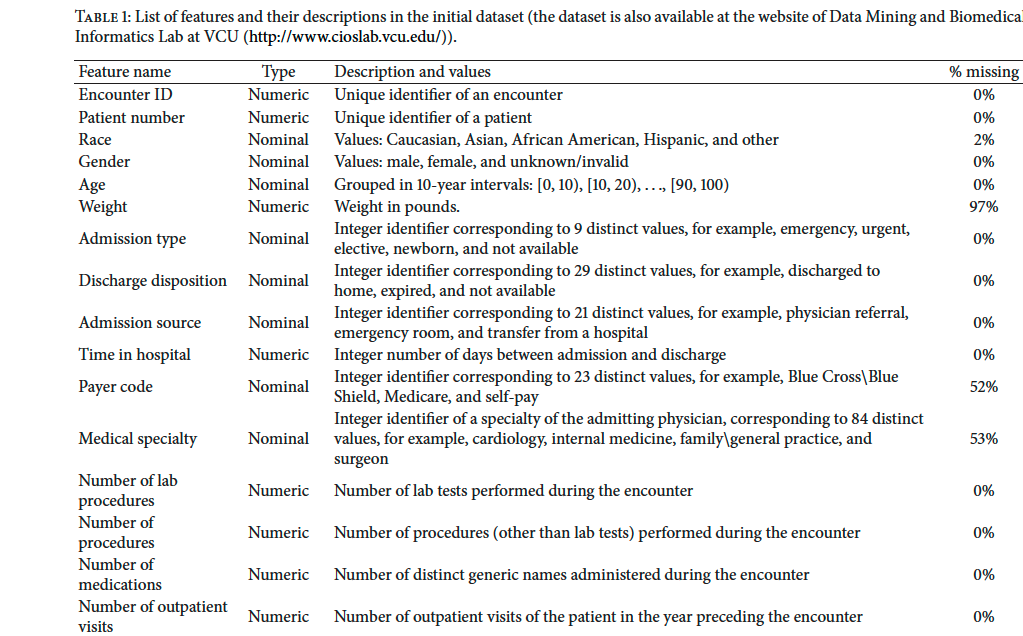
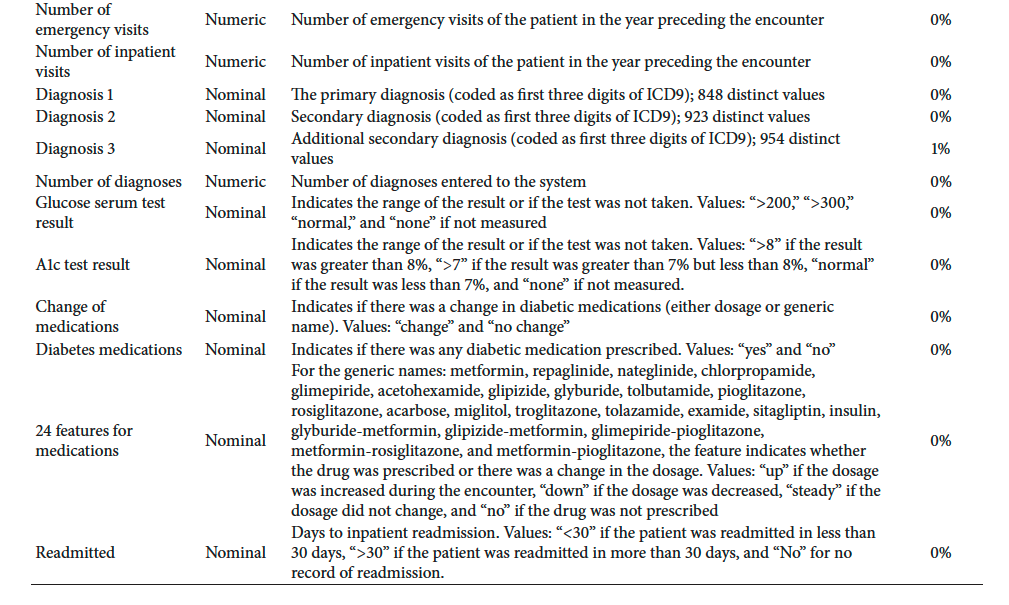

## i) Loading the data

In [3]:
raw_df=pd.read_csv("../Data/Raw/1/diabetic_data.csv")
print(raw_df.head())
print(raw_df.shape)

   encounter_id  patient_nbr             race  gender      age weight  \
0       2278392      8222157        Caucasian  Female   [0-10)      ?   
1        149190     55629189        Caucasian  Female  [10-20)      ?   
2         64410     86047875  AfricanAmerican  Female  [20-30)      ?   
3        500364     82442376        Caucasian    Male  [30-40)      ?   
4         16680     42519267        Caucasian    Male  [40-50)      ?   

   admission_type_id  discharge_disposition_id  admission_source_id  \
0                  6                        25                    1   
1                  1                         1                    7   
2                  1                         1                    7   
3                  1                         1                    7   
4                  1                         1                    7   

   time_in_hospital  ... citoglipton insulin  glyburide-metformin  \
0                 1  ...          No      No                   No

In [4]:
print(raw_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [5]:
print(raw_df.describe())

       encounter_id   patient_nbr  admission_type_id  \
count  1.017660e+05  1.017660e+05      101766.000000   
mean   1.652016e+08  5.433040e+07           2.024006   
std    1.026403e+08  3.869636e+07           1.445403   
min    1.252200e+04  1.350000e+02           1.000000   
25%    8.496119e+07  2.341322e+07           1.000000   
50%    1.523890e+08  4.550514e+07           1.000000   
75%    2.302709e+08  8.754595e+07           3.000000   
max    4.438672e+08  1.895026e+08           8.000000   

       discharge_disposition_id  admission_source_id  time_in_hospital  \
count             101766.000000        101766.000000     101766.000000   
mean                   3.715642             5.754437          4.395987   
std                    5.280166             4.064081          2.985108   
min                    1.000000             1.000000          1.000000   
25%                    1.000000             1.000000          2.000000   
50%                    1.000000             7.00000

In [6]:
from ydata_profiling import ProfileReport

profile = ProfileReport(raw_df, title="Diabetes Dataset Report", explorative=True)
output_path = "../Reports/diabetes_report_rawData.html"
profile.to_file(output_path)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:01<00:00, 29.89it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 3) Data Cleaning & Transformation
Handle missing values, categorical inconsistencies, duplicates, outliers.

## i) Duplicated entry Check step

In [7]:
# The unique column was encounter_id so chechking any duplicated values in this column
print(raw_df['encounter_id'].nunique())
print(len(raw_df))

## No duplicated entries

101766
101766


## ii) Remove the unwanted columns


In [8]:
print(raw_df.nunique().sort_values())

citoglipton                      1
examide                          1
troglitazone                     2
change                           2
metformin-pioglitazone           2
metformin-rosiglitazone          2
glimepiride-pioglitazone         2
glipizide-metformin              2
acetohexamide                    2
tolbutamide                      2
diabetesMed                      2
A1Cresult                        3
max_glu_serum                    3
readmitted                       3
tolazamide                       3
gender                           3
acarbose                         4
rosiglitazone                    4
pioglitazone                     4
glyburide                        4
glipizide                        4
insulin                          4
glimepiride                      4
glyburide-metformin              4
miglitol                         4
chlorpropamide                   4
metformin                        4
repaglinide                      4
nateglinide         

In [9]:
# These 2 columns has 1 unique values only & encounter_id, patient_nbr columns as they are ids and dont hold any meaning
cleaned_df=raw_df.drop(columns=['citoglipton','examide','patient_nbr','encounter_id'])
cleaned_df.shape


(101766, 46)

In [10]:
# Columns with missing values %age
((pd.DataFrame(cleaned_df.isnull().sum(), columns=['missing_count']))/len(cleaned_df))*100

# Since max_glu_serum & A1Cresult had >50% of the data as missing we wont be removing these 2 columns because
# NAN indicate that the test was not performed


,missing_count
race,0.000000
gender,0.000000
age,0.000000
weight,0.000000
admission_type_id,0.000000
discharge_disposition_id,0.000000
admission_source_id,0.000000
time_in_hospital,0.000000
payer_code,0.000000
medical_specialty,0.000000


## iii) Replacing '?' with NAN throughout the dataset

In [11]:
# %age of values per columns with '?'
((cleaned_df == '?').sum()/len(cleaned_df))*100

race                         2.233555
gender                       0.000000
age                          0.000000
weight                      96.858479
admission_type_id            0.000000
discharge_disposition_id     0.000000
admission_source_id          0.000000
time_in_hospital             0.000000
payer_code                  39.557416
medical_specialty           49.082208
num_lab_procedures           0.000000
num_procedures               0.000000
num_medications              0.000000
number_outpatient            0.000000
number_emergency             0.000000
number_inpatient             0.000000
diag_1                       0.020636
diag_2                       0.351787
diag_3                       1.398306
number_diagnoses             0.000000
max_glu_serum                0.000000
A1Cresult                    0.000000
metformin                    0.000000
repaglinide                  0.000000
nateglinide                  0.000000
chlorpropamide               0.000000
glimepiride 

In [12]:
# Instead of removing the columns, replace them with NAN and might remove later after baseline model evaluation is done
cleaned_df=cleaned_df.replace(['?',r'^\s*$'],np.nan)
((cleaned_df == '?').sum()/len(cleaned_df))*100

race                        0.0
gender                      0.0
age                         0.0
weight                      0.0
admission_type_id           0.0
discharge_disposition_id    0.0
admission_source_id         0.0
time_in_hospital            0.0
payer_code                  0.0
medical_specialty           0.0
num_lab_procedures          0.0
num_procedures              0.0
num_medications             0.0
number_outpatient           0.0
number_emergency            0.0
number_inpatient            0.0
diag_1                      0.0
diag_2                      0.0
diag_3                      0.0
number_diagnoses            0.0
max_glu_serum               0.0
A1Cresult                   0.0
metformin                   0.0
repaglinide                 0.0
nateglinide                 0.0
chlorpropamide              0.0
glimepiride                 0.0
acetohexamide               0.0
glipizide                   0.0
glyburide                   0.0
tolbutamide                 0.0
pioglita

## iv) Target definition clarity
Identify the distribution of <30, >30 & No and decide whether to analyse it is a binary class or multi class classification problem

In [13]:
cleaned_df['readmitted'].value_counts(normalize=True)*100

readmitted
NO     53.911916
>30    34.928169
<30    11.159916
Name: proportion, dtype: float64

Not highly imbalance dataset hence going with multi-class classification to early predict the readmission time as <30, >30 or Not

In an early prediction model, high-risk predictions can trigger real-time interventions - such as closer monitoring, medication review, or social support - potentially reducing readmission risk.
In contrast, discharge-time models primarily inform follow-up and resource allocation, since the patient is already leaving the hospital.

Hence our main goal here is an early prediction multi-class classification model 

## v) Would I know this information before the patient is discharged? --> For all columns
1) discharge_disposition_id --> can lead to potential data leakage as patient who died will not be readmitted 
or patient who are moved to rehab or readmission facility will come back
2) payer_code --> highly missing and doesnt make sence as to which insurance companies pays the bill impacts the readmission in diabetic patient
Removing these two columns

In [14]:
cleaned_df.drop(['discharge_disposition_id','payer_code'], inplace=True, axis=1)
print(cleaned_df.shape)

(101766, 44)


## vi) Identify high cardinality columns i.e., columns with high number of unique values

In [15]:
cleaned_df.nunique().sort_values(ascending=False)
# low cardinality <10, medium 10-100, high >100
# diag_1,2,3 and num_lab_procedures has high cardinality, 

diag_3                      789
diag_2                      748
diag_1                      716
num_lab_procedures          118
num_medications              75
medical_specialty            72
number_outpatient            39
number_emergency             33
number_inpatient             21
admission_source_id          17
number_diagnoses             16
time_in_hospital             14
age                          10
weight                        9
admission_type_id             8
num_procedures                7
race                          5
glipizide                     4
glyburide-metformin           4
insulin                       4
miglitol                      4
acarbose                      4
rosiglitazone                 4
pioglitazone                  4
glyburide                     4
nateglinide                   4
chlorpropamide                4
glimepiride                   4
repaglinide                   4
metformin                     4
A1Cresult                     3
tolazami

In [16]:
print(cleaned_df['diag_1'].value_counts())

diag_1
428    6862
414    6581
786    4016
410    3614
486    3508
       ... 
817       1
61        1
148       1
870       1
V51       1
Name: count, Length: 716, dtype: int64


### Convert the diagnosis codes into subgroups based on ICD9 codes

In [17]:
# Got the ICD9 codes from https://www.icd9data.com/2012/Volume1/default.htm 
#!pip install openpyxl
import openpyxl
ICD9_codeDB = pd.read_excel("../Data/Raw/ICD9_Codes.xlsx")
ICD9_codeDB.head()


,ICD9_code,Diagnosis
0,001-139,Infectious And Parasitic Diseases
1,140-239,Neoplasms
2,240-279,"Endocrine, Nutritional And Metabolic Diseases,..."
3,280-289,Diseases Of The Blood And Blood-Forming Organs
4,290-319,Mental Disorders


In [18]:
ICD9_codeDB[['ICD9_lower', 'ICD9_upper']] =ICD9_codeDB['ICD9_code'].str.split('-', expand=True)
ICD9_codeDB

,ICD9_code,Diagnosis,ICD9_lower,ICD9_upper
0,001-139,Infectious And Parasitic Diseases,001,139
1,140-239,Neoplasms,140,239
2,240-279,"Endocrine, Nutritional And Metabolic Diseases,...",240,279
3,280-289,Diseases Of The Blood And Blood-Forming Organs,280,289
4,290-319,Mental Disorders,290,319
5,320-389,Diseases Of The Nervous System And Sense Organs,320,389
6,390-459,Diseases Of The Circulatory System,390,459
7,460-519,Diseases Of The Respiratory System,460,519
8,520-579,Diseases Of The Digestive System,520,579
9,580-629,Diseases Of The Genitourinary System,580,629


In [19]:
import pandas as pd

def find_diagnosis(val):
    # 1) Handle missing / '?' early
    if pd.isna(val) or val == '?':
        return 'Unknown'

    val_str = str(val)

    for _, row in ICD9_codeDB.iterrows():
        low = str(row['ICD9_lower'])
        high = str(row['ICD9_upper'])

        try:
            # 2) Try numeric comparison
            if float(low) <= float(val) <= float(high):
                return row['Diagnosis']
        except:
            # 3) Fallback to string comparison for codes like E/V
            if low <= val_str <= high:
                return row['Diagnosis']

    # 4) If no match found in any range
    return 'Unknown'


# Apply it correctly
cleaned_df['diag_1_category'] = cleaned_df['diag_1'].apply(find_diagnosis)
cleaned_df['diag_2_category'] = cleaned_df['diag_2'].apply(find_diagnosis)
cleaned_df['diag_3_category'] = cleaned_df['diag_3'].apply(find_diagnosis)



In [20]:
print(cleaned_df.iloc[10:20,[14,15,16,44]])
print(cleaned_df['diag_1_category'].nunique())
print(cleaned_df.shape)

   diag_1  diag_2 diag_3                                    diag_1_category
10  250.7     403    996  Endocrine, Nutritional And Metabolic Diseases,...
11    157     288    197                                          Neoplasms
12    428  250.43  250.6                 Diseases Of The Circulatory System
13    428     411    427                 Diseases Of The Circulatory System
14    518     998    627                 Diseases Of The Respiratory System
15    999     507    996                               Injury And Poisoning
16    410     411    414                 Diseases Of The Circulatory System
17    682     174    250       Diseases Of The Skin And Subcutaneous Tissue
18    402     425    416                 Diseases Of The Circulatory System
19    737     427    714  Diseases Of The Musculoskeletal System And Con...
19
(101766, 47)


In [21]:
# Remove the columns diag_1,diag_2 & diag_3
cleaned_df.drop(['diag_1','diag_2','diag_3'], inplace=True, axis=1)
print(cleaned_df.shape)


(101766, 44)


## vii) Missingness treatment strategy

Types of Missingness: 

1) MCAR – Missing Completely at Random

Missingness is unrelated to any variable or outcome.

Example: A lab result missing due to a random system error.

Safe to impute (mean/median) or drop if the proportion is small.
Implication: Standard imputations won’t bias results.

2) MAR – Missing at Random

Missingness is related to other observed variables, but not the missing value itself.

Example: Blood glucose tests more often missing in younger, healthier patients.

Use model-based imputations (e.g., regression, KNN).
Implication: Conditional methods best preserve data relationships.

3) MNAR – Missing Not at Random

Missingness depends on the unobserved value itself (informative).

Example: A1C test not performed because clinician didn’t suspect diabetes.

Add a missing indicator or treat “missing” as a meaningful category.
Implication: Missingness carries predictive information — don’t blindly impute.

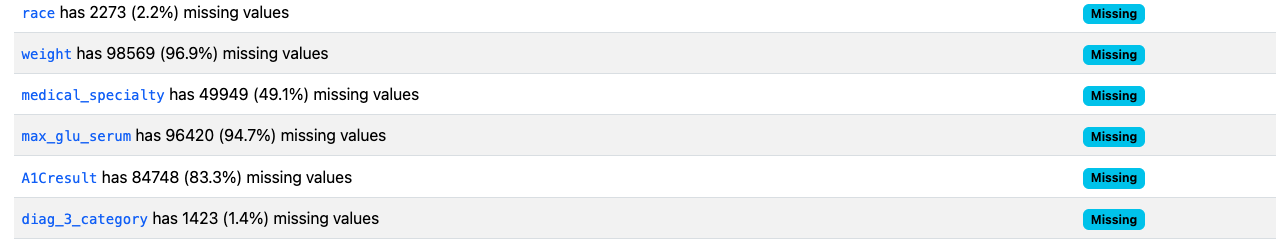

Imputation strategy
1) Race --> can be imputed with mode of the data
2) Weight --> 1 if measured else 0
3) Medical_speciality --> replace it with unknown
4) diag_3 (now diag_3_category) --> replace it with 'NoSecondaryDiagnosis'
5) max_glu_serum --> Replace missing with 'NotPerformed'
6) A1cresult --> Replace missing with 'NotPerformed'


In [22]:
cleaned_df['race'].fillna(cleaned_df['race'].mode()[0],inplace=True)
cleaned_df['weight']=cleaned_df['weight'].apply(lambda x:1 if not pd.isna(x) else 0)
cleaned_df['medical_specialty'].fillna('Unknown', inplace=True)
cleaned_df['diag_3_category'].fillna('NoSecondaryDiagnosis', inplace=True)
cleaned_df['max_glu_serum'].fillna('NotPerformed', inplace=True)
cleaned_df['A1Cresult'].fillna('NotPerformed', inplace=True)

/var/folders/kn/l8641p151k93sbb2vg6hs5ph0000gn/T/ipykernel_46288/1504606650.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['race'].fillna(cleaned_df['race'].mode()[0],inplace=True)
/var/folders/kn/l8641p151k93sbb2vg6hs5ph0000gn/T/ipykernel_46288/1504606650.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are

In [23]:
#generate report on cleaned df
from ydata_profiling import ProfileReport

profile = ProfileReport(cleaned_df, title="Diabetes Dataset Report", explorative=True)
output_path = "../Reports/diabetes_report_CleanedData1.html"
profile.to_file(output_path)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 44/44 [00:01<00:00, 23.03it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# 4) EDA & Visualization
Understand distributions, relationships with target, and correlations.
Remove the columns that highly correlated among themselves; 


Univariate Analysis: Univariate analysis examines individual variables to understand their distributions and summary statistics. This includes calculating measures such as mean, median, mode, and standard deviation, and visualizing the data using histograms, bar charts, box plots, and violin plots.

Bivariate Analysis: Bivariate analysis explores the relationship between two variables. It uncovers patterns through techniques like scatter plots, pair plots, and heatmaps. This helps to identify potential associations or dependencies between variables.

Multivariate Analysis: Multivariate analysis involves examining more than two variables simultaneously to understand their relationships and combined effects. Techniques such as contour plots, and principal component analysis (PCA) are commonly used in multivariate EDA.

In [24]:
len(cleaned_df.columns)/4

11.0

In [25]:
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def plot_categorical_distribution():

    cat_cols = [c for c in cleaned_df.columns if cleaned_df[c].dtype == 'O']

    n_per_fig = 6      # how many variables per figure
    n_cols = 3         # 3 plots per row

    with PdfPages("../Reports/Figures/categorical_plots.pdf") as pdf:

        for start in range(0, len(cat_cols), n_per_fig):
            subset = cat_cols[start:start + n_per_fig]
            n_rows = math.ceil(len(subset) / n_cols)

            fig, axes = plt.subplots(n_rows, n_cols, figsize=(9 * n_cols, 10 * n_rows))
            axes = axes.ravel()

            for idx, col in enumerate(subset):
                counts = cleaned_df[col].value_counts()

                if len(counts) > 15:
                    counts = counts.head(15)

                counts.plot(kind="bar", ax=axes[idx])
                axes[idx].set_title(col)
                axes[idx].set_xlabel("")
                axes[idx].set_ylabel("Count")
                axes[idx].tick_params(axis='x', rotation=45)

            # turn off any empty unused subplots
            for j in range(idx + 1, len(axes)):
                axes[j].axis("off")

            plt.tight_layout()

            pdf.savefig(fig)

            plt.close(fig)  # close figure to free memory

plot_categorical_distribution()


In [26]:
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def plot_numerical_distribution():

    num_cols = [c for c in cleaned_df.columns if cleaned_df[c].dtype == 'int64']

    n_per_fig = 6      # how many variables per figure
    n_cols = 3         # 3 plots per row

    with PdfPages("../Reports/Figures/numerical_plots.pdf") as pdf:

        for start in range(0, len(num_cols), n_per_fig):
            subset = num_cols[start:start + n_per_fig]
            n_rows = math.ceil(len(subset) / n_cols)

            fig, axes = plt.subplots(n_rows, n_cols, figsize=(9 * n_cols, 10 * n_rows))
            axes = axes.ravel()

            for idx, col in enumerate(subset):

                data = cleaned_df[col].dropna()

                # main axis → histogram
                ax1 = axes[idx]
                ax1.hist(data, alpha=0.5, color='tab:blue')
                ax1.set_ylabel("Count")

                # secondary axis → KDE
                ax2 = ax1.twinx()
                data.plot(kind="kde", ax=ax2, color='tab:red')
                ax2.set_ylabel("Density")

                ax1.set_title(col)
                ax1.set_xlabel("")
                ax1.tick_params(axis='x', rotation=45)

            # turn off unused axes
            for j in range(idx + 1, len(axes)):
                axes[j].axis("off")

            plt.tight_layout()
            pdf.savefig(fig)
            plt.close(fig)

plot_numerical_distribution()


In [27]:
import math
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

# select numerical columns
num_cols = cleaned_df.select_dtypes(include=['int64','float64']).columns

# how many plots to show on one page
n_per_fig = 4       # 4 plots per page
n_cols = 2          # 2 plots per row
n_rows = 2          # 2 rows → 4 plots per figure

with PdfPages("../Reports/Figures/boxplots_outliers.pdf") as pdf:
    for start in range(0, len(num_cols), n_per_fig):
        subset = num_cols[start:start + n_per_fig]

        fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 10))
        axes = axes.ravel()

        for idx, col in enumerate(subset):
            cleaned_df.boxplot(column=col, ax=axes[idx],grid=False)
            axes[idx].set_title(col)

        # hide empty subplots
        for j in range(len(subset), len(axes)):
            axes[j].axis("off")

        plt.tight_layout()
        pdf.savefig(fig)   # save this figure to PDF
        plt.close(fig)

print("PDF saved as boxplots_outliers.pdf")


PDF saved as boxplots_outliers.pdf


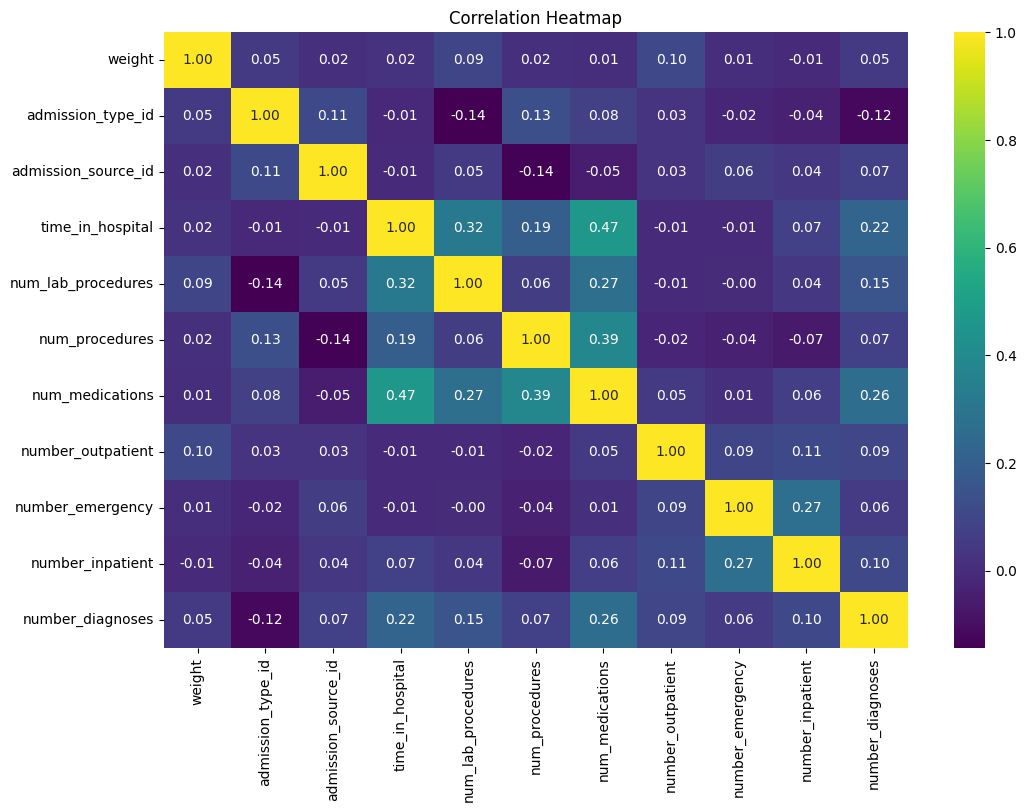

In [28]:
# Correlation with target variable and among themselves
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
corr = cleaned_df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="viridis")
plt.title("Correlation Heatmap")
plt.show()


In [29]:
!pip install phik


interval columns not set, guessing: ['weight', 'admission_type_id', 'admission_source_id', 'time_in_hospital', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses']


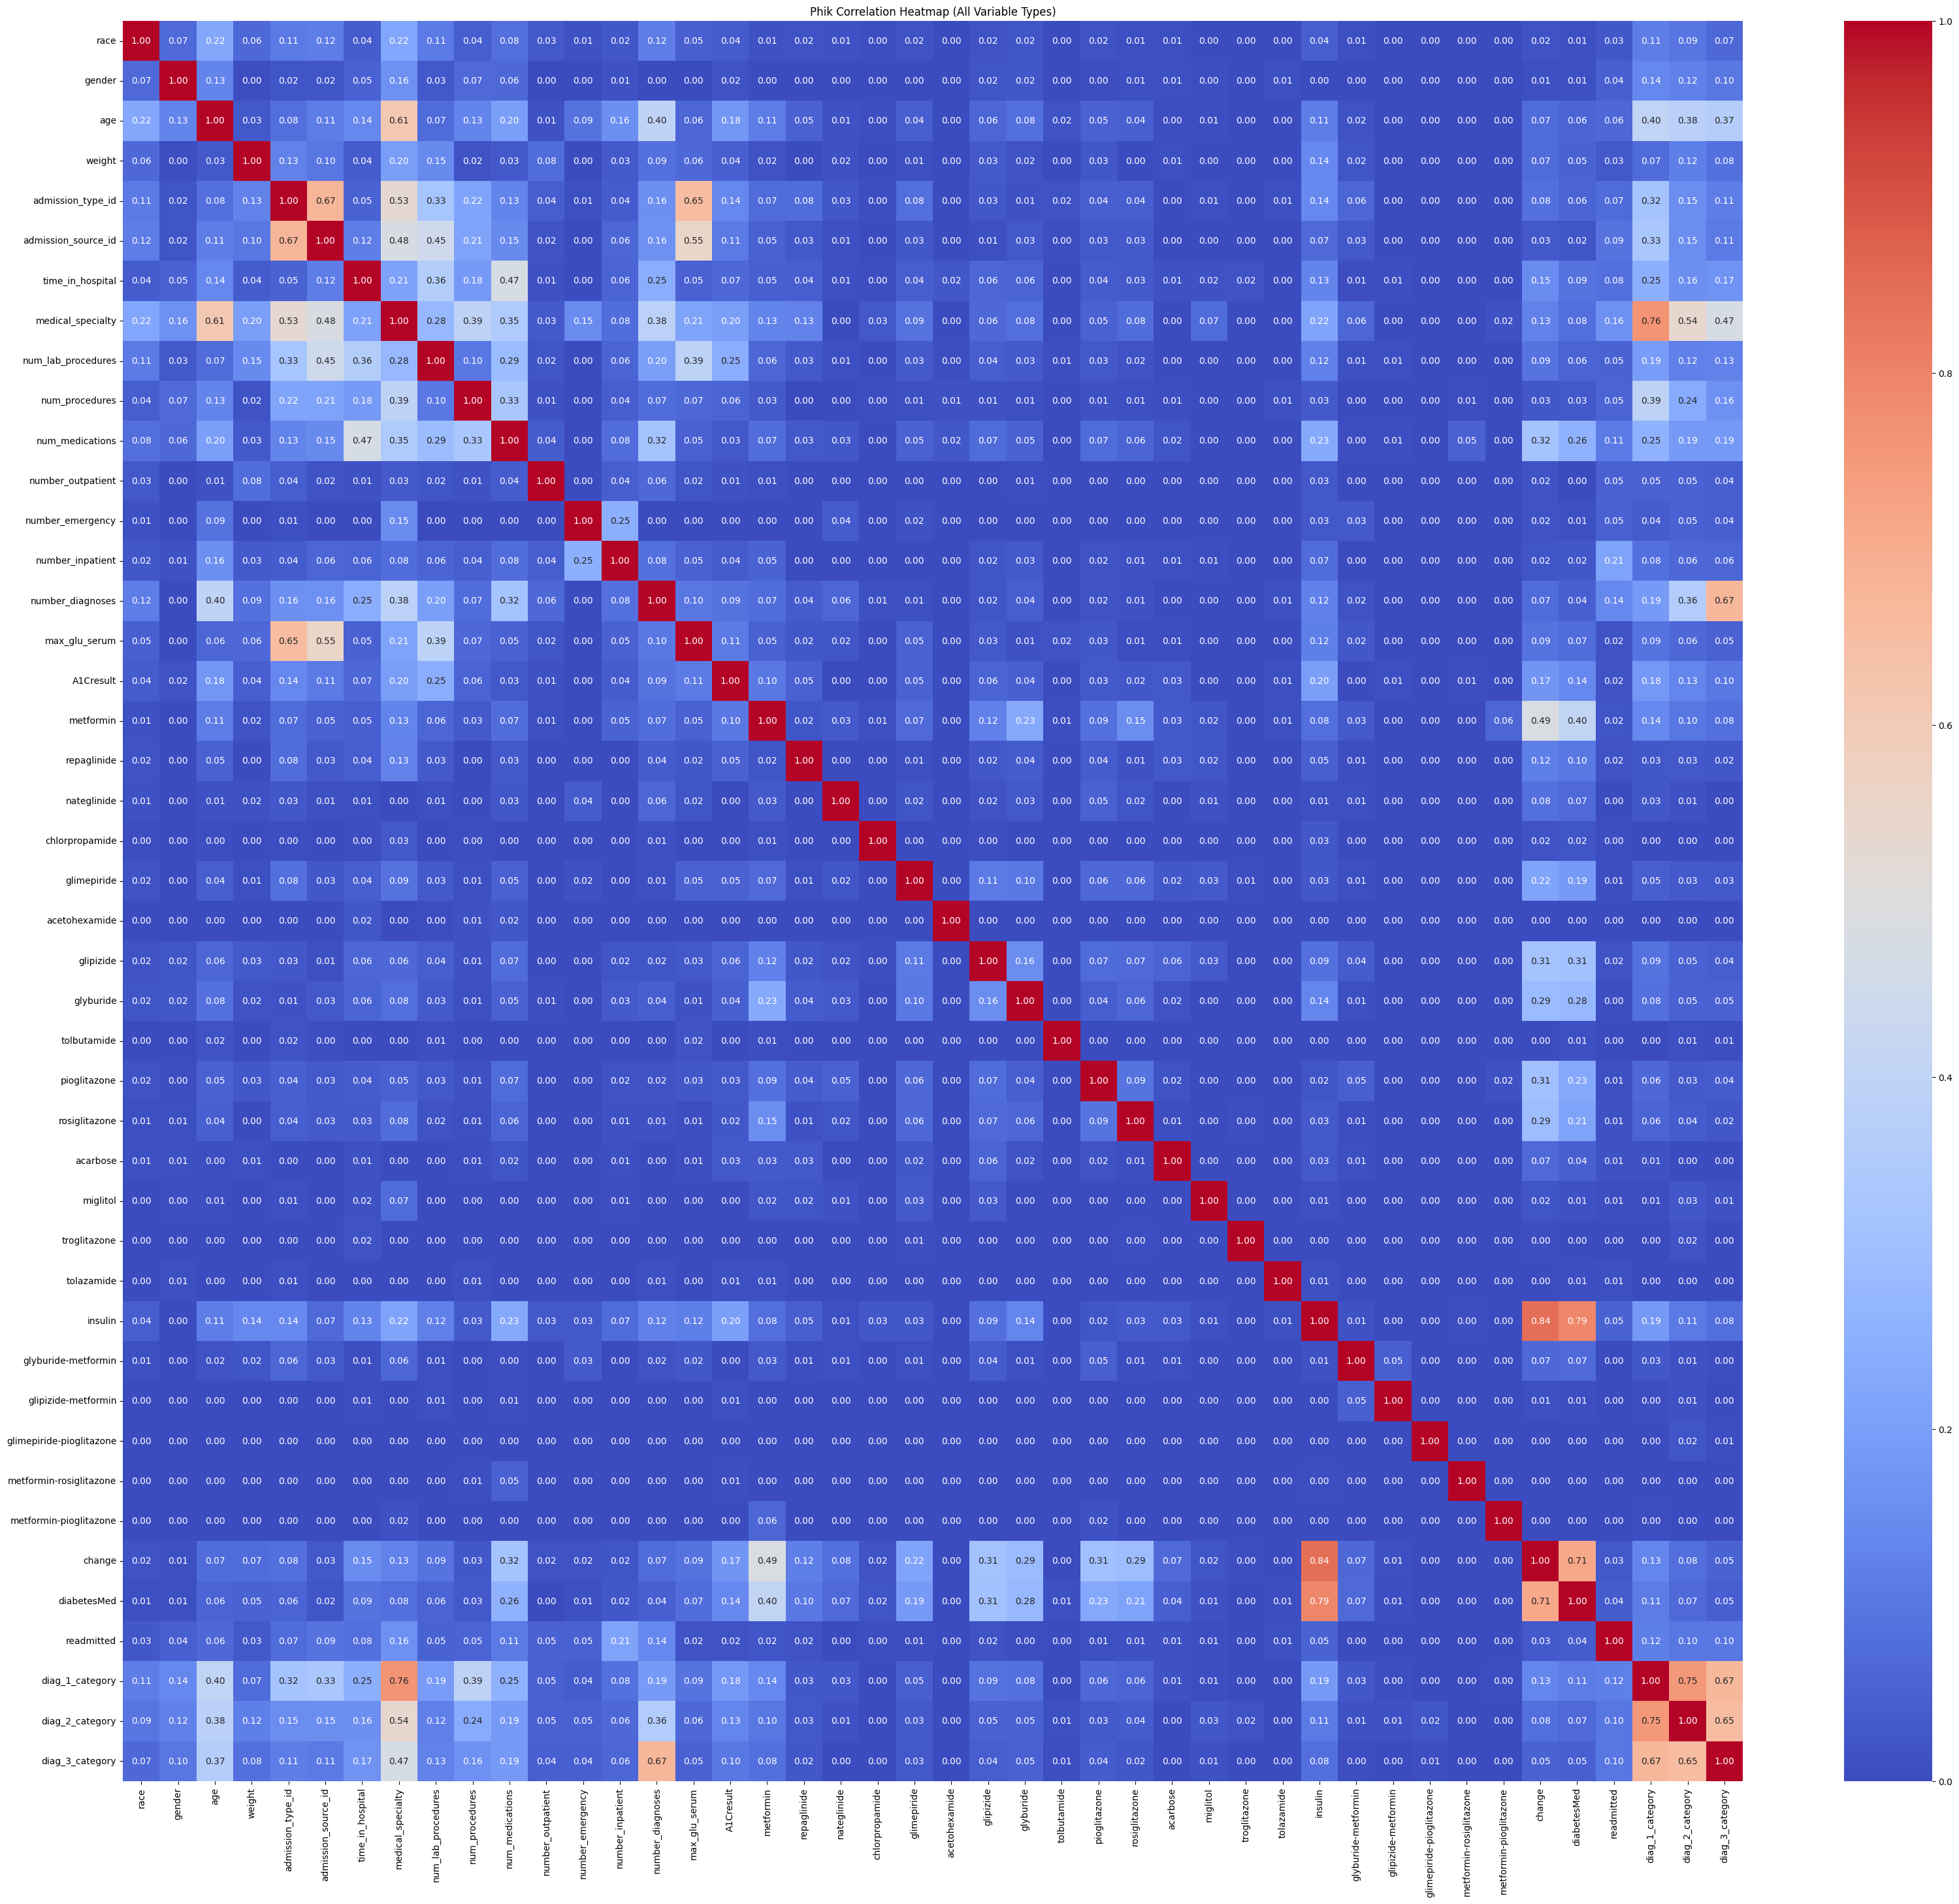

In [30]:
from phik import phik_matrix
import seaborn as sns
import matplotlib.pyplot as plt

phik_corr = cleaned_df.phik_matrix()

plt.figure(figsize=(40,35))
sns.heatmap(phik_corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title("Phik Correlation Heatmap (All Variable Types)")
plt.show()


In [31]:
from ydata_profiling import ProfileReport

profile = cleaned_df.profile_report(
    title="My Report",
    correlations={
        "phi_k": {
            "calculate": True,
            "warn_high_correlations": True,
            "threshold": 0.9,
        },
        "pearson": {"calculate": False},
        "spearman": {"calculate": False},
        "kendall": {"calculate": False},
        "cramers": {"calculate": False},
        "auto": {"calculate": False},
    },
)
profile.to_file("../Reports/diabetes_report_PhikCorr.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 44/44 [00:02<00:00, 21.25it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [32]:
import numpy as np
import pandas as pd

# choose your cutoff
THRESHOLD = 0.6   # you can try 0.5, 0.7 etc.

# copy so we don't change original
phik_abs = phik_corr.abs().copy()

# remove self-correlation on diagonal
np.fill_diagonal(phik_abs.values, 0)

# find pairs above threshold
high_pairs = []
cols = phik_abs.columns

for i in range(len(cols)):
    for j in range(i+1, len(cols)):   # i+1 avoids duplicate/reverse pairs
        val = phik_abs.iloc[i, j]
        if val >= THRESHOLD:
            high_pairs.append((cols[i], cols[j], val))

high_corr_df = pd.DataFrame(high_pairs,
                            columns=["var1", "var2", "phik"])

print(high_corr_df.sort_values("phik", ascending=False))


                 var1                 var2      phik
5             insulin               change  0.843831
6             insulin          diabetesMed  0.793598
3   medical_specialty      diag_1_category  0.763436
8     diag_1_category      diag_2_category  0.753078
7              change          diabetesMed  0.714114
1   admission_type_id  admission_source_id  0.672956
9     diag_1_category      diag_3_category  0.668845
4    number_diagnoses      diag_3_category  0.668050
2   admission_type_id        max_glu_serum  0.654870
10    diag_2_category      diag_3_category  0.649550
0                 age    medical_specialty  0.610925


In [33]:
#medical_specialty → Dropped because it has many missing/“Unknown” values and adds little reliable signal.
#change → Dropped because it is a derived flag and highly redundant with insulin usage.
#diabetesMed → Dropped because it overlaps strongly with insulin and provides no additional information.
cleaned_df.drop(['medical_specialty','change','diabetesMed'], inplace=True, axis=1)
print(cleaned_df.shape)

(101766, 41)


In [34]:
print(cleaned_df.nunique().sort_values(ascending=False))

num_lab_procedures          118
num_medications              75
number_outpatient            39
number_emergency             33
number_inpatient             21
diag_3_category              19
diag_1_category              19
diag_2_category              19
admission_source_id          17
number_diagnoses             16
time_in_hospital             14
age                          10
admission_type_id             8
num_procedures                7
race                          5
A1Cresult                     4
pioglitazone                  4
max_glu_serum                 4
glyburide-metformin           4
insulin                       4
metformin                     4
acarbose                      4
rosiglitazone                 4
miglitol                      4
nateglinide                   4
chlorpropamide                4
repaglinide                   4
glyburide                     4
glimepiride                   4
glipizide                     4
tolazamide                    3
gender  

# 5) Feature Engineering
encode; scale etc

In [35]:
# y: 3-class target 
y = cleaned_df['readmitted'].map({
    'NO': 0,
    '>30': 1,
    '<30': 2
})

# X: all features (no target)
X = cleaned_df.drop(columns=['readmitted'])


In [36]:
#Age bins → numeric midpoints
age_map = {
    '[0-10)': 5,
    '[10-20)': 15,
    '[20-30)': 25,
    '[30-40)': 35,
    '[40-50)': 45,
    '[50-60)': 55,
    '[60-70)': 65,
    '[70-80)': 75,
    '[80-90)': 85,
    '[90-100)': 95
}
X['age'] = X['age'].map(age_map)

#Medications: No/Steady/Up/Down → 0/1/2/3 

medication_cols = [
    'insulin','metformin','acarbose','miglitol','nateglinide','chlorpropamide','repaglinide',
    'glyburide','glimepiride','glipizide','pioglitazone','acetohexamide',
    'tolbutamide','rosiglitazone','troglitazone','tolazamide','glyburide-metformin',
    'glimepiride-pioglitazone','metformin-rosiglitazone','metformin-pioglitazone'

]
medication_mapping = {"No": 0, "Steady": 1, "Up": 2, "Down": 3}

for col in medication_cols:
    X[col] = X[col].map(medication_mapping)


In [37]:
numeric_cols = [
    'num_lab_procedures', 'num_medications', 'number_outpatient',
    'number_emergency', 'number_inpatient', 'number_diagnoses',
    'time_in_hospital', 'num_procedures', 'age', 'weight'
] + medication_cols   # meds are numeric now, so add them here

high_card_cols = ['diag_1_category', 'diag_2_category', 'diag_3_category', 'admission_source_id']

low_card_cols = ['admission_type_id', 'race', 'gender', 'A1Cresult', 'max_glu_serum']


In [38]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from category_encoders import TargetEncoder

preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),                           # scale numeric
        ('low', OneHotEncoder(drop='first', handle_unknown='ignore'), low_card_cols),  # one-hot small categoricals
        ('high', TargetEncoder(), high_card_cols),                         # target encode big categoricals
    ],
    remainder='drop'
)


In [39]:
X.isna().sum().sort_values(ascending=False)


race                        0
gender                      0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
metformin-rosiglitazone     0
metformin-pioglitazone      0
diag_1_category             0
diag_2_category             0
acetohexamide               0
glimepiride                 0
chlorpropamide              0
num_medications             0
age                         0
weight                      0
admission_type_id           0
admission_source_id         0
time_in_hospital            0
num_lab_procedures          0
num_procedures              0
number_outpatient           0
nateglinide                 0
number_emergency            0
number_inp

In [44]:
# Check target
print(y.value_counts())

# Check for missing values in X
print(X.isna().sum().sort_values(ascending=False).head(15))


readmitted
0    54864
1    35545
2    11357
Name: count, dtype: int64
race                        0
gender                      0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose                    0
miglitol                    0
troglitazone                0
tolazamide                  0
insulin                     0
glyburide-metformin         0
glipizide-metformin         0
glimepiride-pioglitazone    0
dtype: int64
